In [16]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import hypernetx as hnx

# Chordal Graphs

Recall that a **chordal graph** is a graph is a graph where every cycle of 4 or more has a chord, where a chord is a an edge connecting two non-consecutive vertices on the cycle.

Chordal graphs were studied in 1961 by Dirac who called them *rigid circuit graphs*. Over the years chordal graphs have been well studied and are one of the most important and intersting family of graphs because of their charactersitic and properties. Many alogirhtmic problems that are NP-complete can be completed in polynomial time for chordal graphs making them extremely important and desirable from an algorithmic graph theory stand point.

There are also many applications of chordal graphs from databases to computational biology and we will explore some of these applications throughout this section. 

# Chordal Graphs and Databases

Chordal graphs have a heavy application in databases. As we saw earlier there are ways to define a hypergraph as a chordal graph. This is an important fact that is often utilized in database theory because if we are able to represent a database scheme as a hypergraph, more specifically an acyclic hypergraph, we are able to use characteristics of chordal graphs in order to query through our data. Below is an example of a database scheme and its hypergraph representation. 

<img src="Diagrams/dataScheme.png">

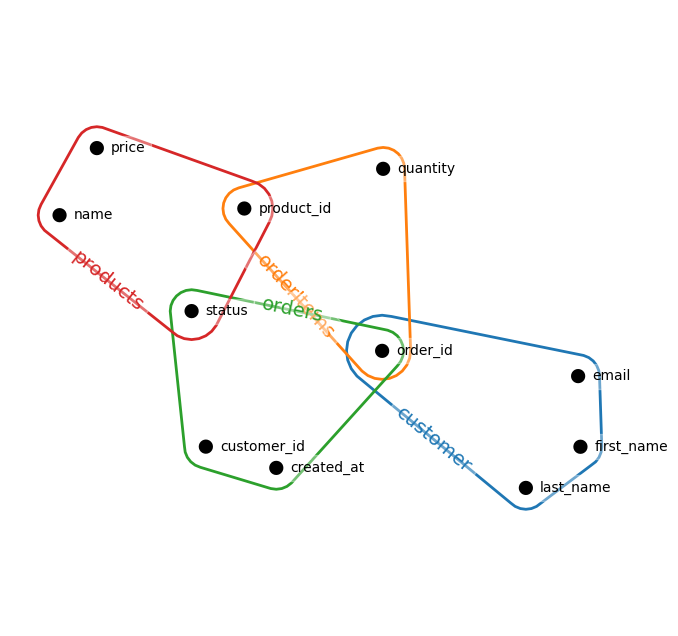

In [15]:
scenes = {
    "orders": ('order_id', 'customer_id', 'status', 'created_at'),
    "orderItems": ('order_id', 'product_id', 'quantity'),
    "customer": ('order_id', 'first_name', 'last_name', 'email'),
    "products": ('product_id', 'name', 'price', 'status')
}

H = hnx.Hypergraph(scenes)



kwargs = {'layout_kwargs': {'seed': 10}, 'with_node_counts': False}

hnx.drawing.draw(H,
    node_labels_kwargs={
        'fontsize': 10
    },
    edge_labels_kwargs={
        'fontsize': 14
    },
    edges_kwargs={
        'linewidths': 2
    },
    **kwargs
)



#plt.savefig('hypergraphDataScheme.png')